# Welcome to our workshop sessions!
## We look forward to having you. This week we will be covering some of the concepts seen in **Chapters 1 & 2**.



Just to recap, although the field of machine learning is composed of supervised learning, unsupervised learning and other topics (such as reinforcement learning), these workshops will follow supervised learning concepts mainly.

Supervise learning concerns the mapping from a variable x to y when the labelling of example is known (**what is the y**).

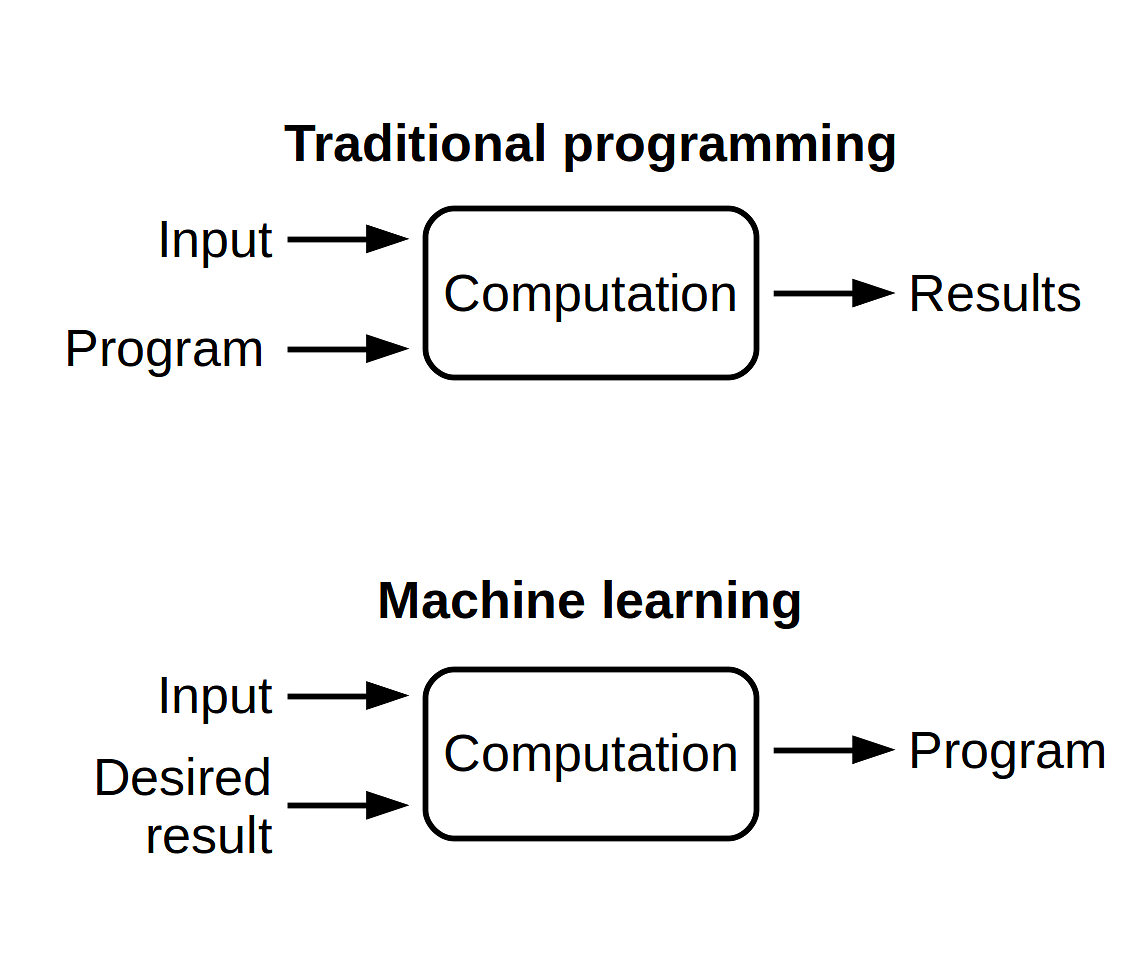

Broadly speaking, supevised learning problems can be broken down into two categories **regressions and classifications**.
*   **Classification** problems can be thought of as categorizing examples. Imagine you have the internet history of a person a you can classify them with a model, take the simple spam vs no spam example in the book.

*   **Regression** problems deal with estimating numerical values. Imagine you have a couple of features for a house (such as the number of bedrooms, location, area, proximity to schools, etc) and we want to estimate the price of the house. That would be a regression problem. 

The **supervised model is what figures out this mapping between independent and dependent variables**. In these sessions we will try to uncover what happens under the hood to make this possible.

How do we go about in choosing the correct ML model for our problem? Should we stick to traditional ML techniques or try deep learning? **There are no easy answers to these questions. As you practice solving different kinds of problems, you'll gain intuition about which estimators work for which problems.**
In the meantime, I recommend this useful link, 
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html.


# Let's implement a simple model!

## **This example can be found in Aurelien Geron's *Hands-On Machine Learning with Scikit-Learn & Tensorflow*. Take age old question about happiness and money.**

## Does money make people happy?

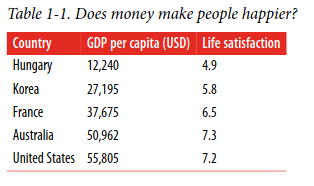

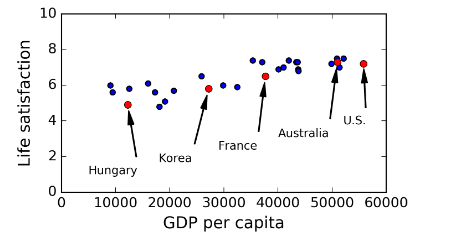

## Knowing if Something is Linear (small deviation)

This seems like some kind of linear fit. We could verify this with some kind of statitical test such as bivariate correlation (https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). This statistical test tells us the linear correlation between X and Y.
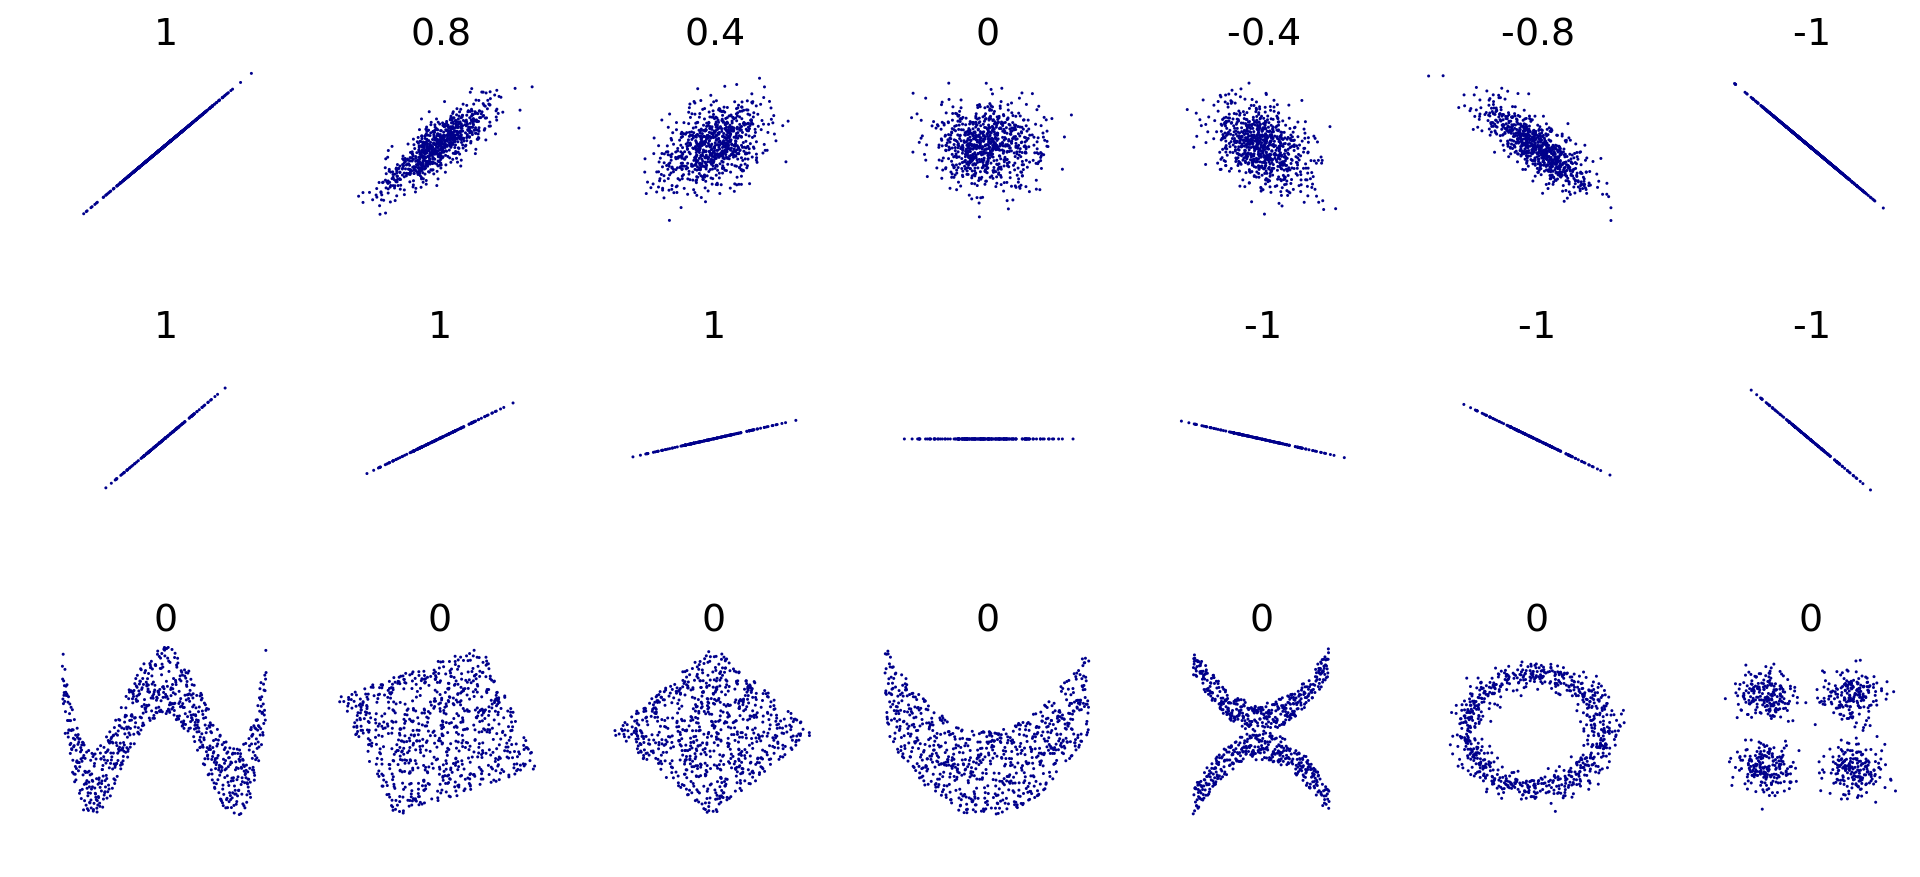



In [ ]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
import pandas as pd
# seed random number generator
seed(2)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50) ##remove data1 to see true randomness in the graph
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2) # _ used because the method returns two variables and one is discarted
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.899


In [ ]:
import matplotlib.pyplot as plt
df = pd.DataFrame(data = [data1, data2]).transpose() # transpose required to obtain column vectors
df.rename(columns={0 : "data1", 1 : "data2"}, inplace = True)


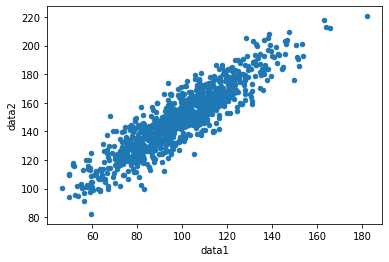

In [ ]:
df.plot(kind='scatter', x="data1", y='data2')

# Returning to the Main Example

This seems like a linear fit, but how do we actually fit the line to our data...


$y = m*x + b$

$life_s = GDP_c*m + intercept$

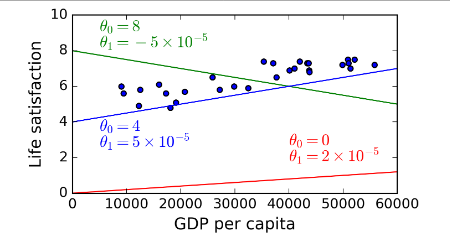

How would our ML algo go about fitting an appropiate slope and intercept to our example? 

First we need to find a way to **quantify the difference between our prediction and the true value**. This value is called the **cost or loss function**. In this case we can utilize the euclidean distance or the absolute value distance.

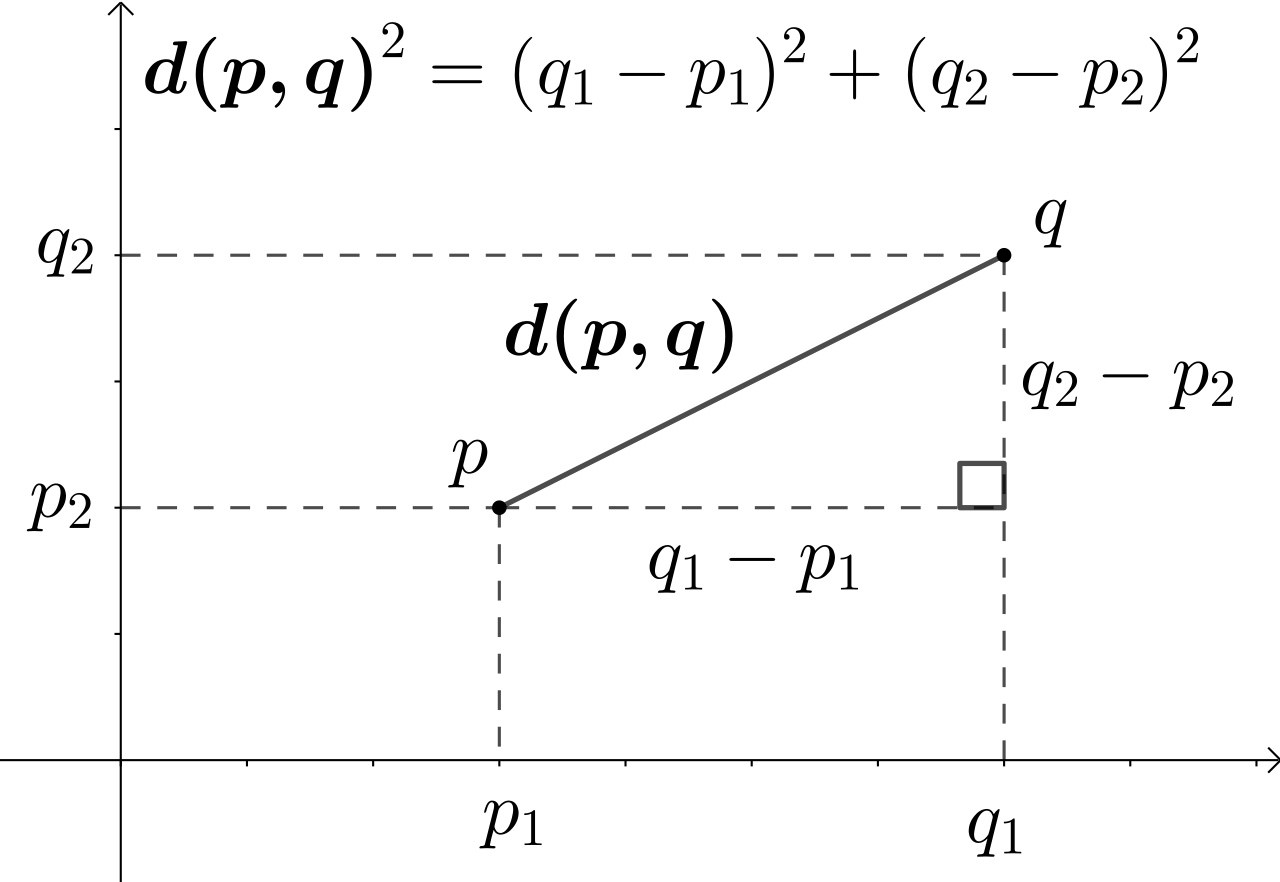





$cost\ function\ {\ f(pred,\ real)\ }\ =\ \sqrt{\sum_{i\ =\ 1}^{n}{({\rm prediction}_i\ -\ {\rm label}_i)}^2}$

### Once we have the value we utilize Calculus to know in what direction we have to travel. 



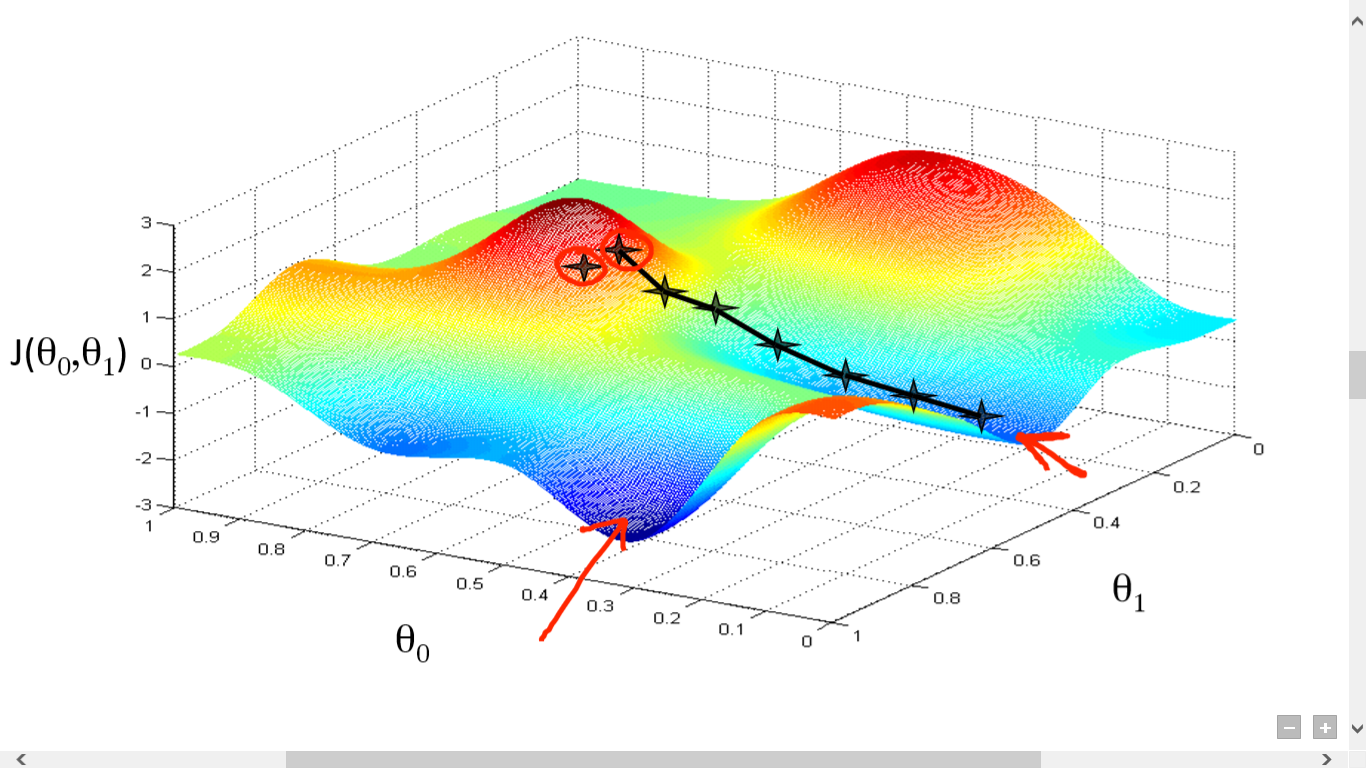

We want to travel in the direction that minimizes our cost function. The valley in this plane in hyperspace. The cost function varies against the possible values of the y-intercepts and slopes that we might choose for our line. As we travel down the plane through gradient descent (as we subtract the derivative of the slope/intercept of their own value) we find this point.

# To summarize...
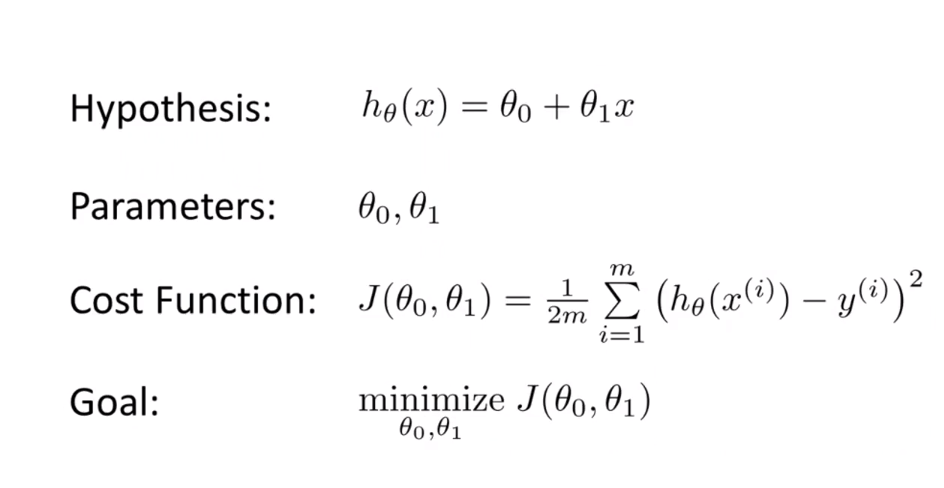

# Now to the example,

In [ ]:
!git clone https://github.com/ageron/handson-ml.git

Cloning into 'handson-ml'...
remote: Enumerating objects: 1556, done.
remote: Total 1556 (delta 0), reused 0 (delta 0), pack-reused 1556
Receiving objects: 100% (1556/1556), 83.48 MiB | 21.62 MiB/s, done.
Resolving deltas: 100% (899/899), done.


In [ ]:
!ls

handson-ml  sample_data


In [ ]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
max_rows, max_cols = 1000, 1000
pd.set_option("display.max_rows", max_rows, "display.max_columns", max_cols)

# Load the data
datapath = "/content/handson-ml/datasets/lifesat/"
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',') #oecd better life index
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

display(oecd_bli.head(3))



,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN


In [ ]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"] #only keeping the total inequality values
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value") #reshapes the dataframe to produce a pivot table from the data
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35] # we eliminated these to have something to compare our fit to later on
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices] # keeps selected indices above (the ones not removed) throuh iloc (an integer locator)

#prepare_country_stats(oecd_bli, gdp_per_capita)


In [ ]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


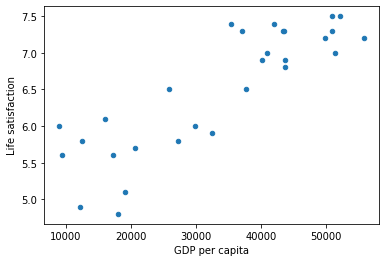

In [ ]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [ ]:
corr, _ = pearsonr(country_stats["GDP per capita"], country_stats["Life satisfaction"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.857


In [ ]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]
#Cyprus is not part of the OECD, but their live satisfaction rating is about 6.2

[[5.96242338]]


In [ ]:
t0, t1 = model.intercept_[0], model.coef_[0][0]
print("life_satisfaction =", "{:.5f}".format(t1), "*GDP_PC +", "{:.5f}".format(t0))
#print equationn

life_satisfaction = 0.00005 *GDP_PC + 4.85305


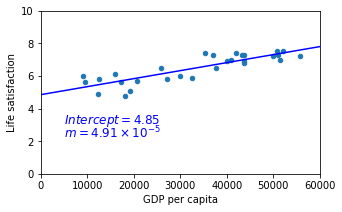

In [ ]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$Intercept= 4.85$", fontsize=12, color="b")
plt.text(5000, 2.2, r"$m = 4.91 \times 10^{-5}$", fontsize=12, color="b")
plt.show()

However, this is an oversimplification. We know that in fact money is not the only factor that leads to happiness (so our fit is based on incomplete information). Also, if we utilize other data points at the extremes we can see that our fit deviates from the actual relationship. So what gives.

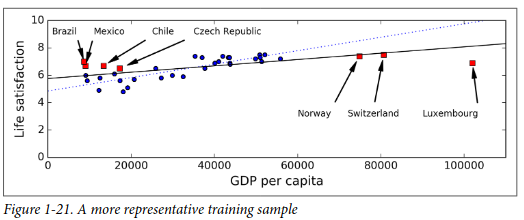

**Also, why did we choose a linear fit?** Maybe some kind of quadratic, cubic, or subquadratic fit could improve the quality of the fit...

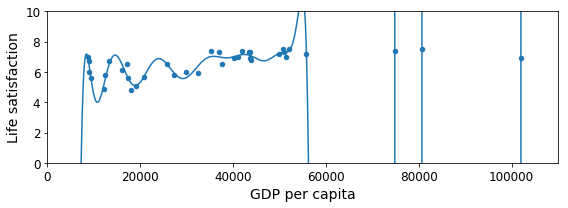

Now we see how many considerations we have to take for each problem. What assumptions have we made, how do they impact the value of our fit and is the data that we have enough?

If you would like to further explore the example above here's the link, https://github.com/ageron/handson-ml/blob/master/01_the_machine_learning_landscape.ipynb

## Why are applications of ML and Deep Learning suddenly rising?

It comes down to the amount of data generated and stored by our usage of the internet and the increase in computational power in the past two decades. Some of these models such as SVM, KNN, and others have been around for many decades. We've only now collected enough data and computation to create meaningful predictive models.

# Any questions on this week's content?